In [1]:
import json
import matplotlib.pyplot as plt

from bdacc import bd_accuracy


def json_load(fpath):
    with open(fpath, 'r') as f:
        data = json.load(f)
    data['acc'] = [f*100 for f in data['top1']]
    return data

In [2]:
visualize = False

# for fname in ['bpg-m4']:
#     data = json_load(f'results/{fname}.json')
#     bd = bd_accuracy(base, data, visualize=visualize)
#     print(bd)

rac_webp = {
    'latency': [4.077],
    'bpp-acc': [json_load('results/webp-m4.json')]
}
rac_bpg = {
    'latency': [45.3],
    'bpp-acc': [json_load('results/bpg-m4.json')]
}
rac_fac_mse = {
    'latency': [47.33],
    'bpp-acc': [json_load('results/rac-bmshj2018-factorized-mse.json')]
}
rac_fac_ms_ssim = {
    'latency': [38.94],
    'bpp-acc': [json_load('results/rac-bmshj2018-factorized-ms-ssim.json')]
}
rac_hyper_mse = {
    'latency': [67.82],
    'bpp-acc': [json_load('results/rac-bmshj2018-hyperprior-mse.json')]
}


wacv2022_code = {
    # 'acc': [0.5737,    0.71608,  0.74226,  0.75096,  0.75314,  0.75632,  0.75928,  0.75916],
    # 'bpp': [0.1465677, 0.330722, 0.595901, 0.886827, 1.311912, 1.831621, 2.592045, 3.653037],
    'acc': [0.5737,    0.71608,  0.74226,  0.75096,  0.75314],
    'bpp': [0.1465677, 0.330722, 0.595901, 0.886827, 1.311912],
    'beta': [1.28,     0.64,     0.32,     0.16,     0.08,     0.04,     0.02,     0.01],
    'name': 'irvine2022wacv'
}
wacv2022_code['acc'] = [f*100 for f in wacv2022_code['acc']]
rac_irvine = {
    'latency': [13.8],
    'bpp-acc': [wacv2022_code]
}

# base = json_load('results/bpg-m4.json')
base = wacv2022_code


rac_webp['bd-acc']          = [bd_accuracy(base, stat) for stat in rac_webp['bpp-acc']]
rac_bpg['bd-acc']           = [bd_accuracy(base, stat) for stat in rac_bpg['bpp-acc']]
rac_fac_mse['bd-acc']       = [bd_accuracy(base, stat) for stat in rac_fac_mse['bpp-acc']]
rac_fac_ms_ssim['bd-acc']   = [bd_accuracy(base, stat) for stat in rac_fac_ms_ssim['bpp-acc']]
rac_hyper_mse['bd-acc']     = [bd_accuracy(base, stat) for stat in rac_hyper_mse['bpp-acc']]
rac_irvine['bd-acc']        = [bd_accuracy(base, stat) for stat in rac_irvine['bpp-acc']]


In [3]:
results_all = dict()
# ours enc
results_all['ours_s8_t_enc'] = {
    'bpp': [0.1216, 0.1596, 0.2154, 0.258, 0.4026, 0.5432, 0.7719, 1.106, 1.689],
    'acc': [45.04, 55.28, 64.53, 66.60, 69.89, 70.78, 73.21, 73.35, 74.48],
}
results_all['ours_s8_m_enc'] = {
    'bpp': [0.1109, 0.1779, 0.2696, 0.4023, 0.5909, 0.8472, 1.452],
    'acc': [65.16,  68.43,  71.35,  71.46,  72.84,  73.47,  74.07],
}
results_all['ours_s8_l_enc'] = {
    'bpp': [0.1109, 0.1855, 0.2853, 0.4034, 0.5478, 0.818, 1.312],
    'acc': [65.54, 69.65, 71.18, 72.15, 72.41, 73.68, 74.11],
}
rac_ours_enc = {
    'latency': [3.95, 6.70, 10.1879],
    'bpp-acc': [
        results_all['ours_s8_t_enc'],
        results_all['ours_s8_m_enc'],
        results_all['ours_s8_l_enc']
    ]
}
rac_ours_enc['bd-acc'] = [bd_accuracy(base, stat) for stat in rac_ours_enc['bpp-acc']]

# ours joint
results_all['ours_s8_tiny'] = {
    'bpp': [0.1117, 0.1372, 0.1786, 0.2829, 0.4206, 0.5508, 0.7209, 1.178, 1.747],
    'acc': [61.99, 63.95, 67.83, 70.69, 73.06, 73.84, 74.07, 74.64, 74.93],
}
results_all['ours_s8_medium'] = {
    'bpp': [0.1102, 0.162, 0.2124, 0.3188, 0.442, 0.7213, 1.194],
    'acc': [68.77, 70.6, 71.53, 72.93, 73.64, 74.88, 75.1],
    'name': 'ours-m'
}
results_all['ours_s8_large'] = {
    'bpp': [0.0908, 0.1373, 0.2228, 0.313, 0.4316, 0.7092, 1.144],
    'acc': [67.93,  70.56,  71.51,  73.0,  73.52,  74.58,  75.21],
    'name': 'ours-l'
}
# results_all['ours_s8_small'] = {
#     'bpp': [0.09303, 0.1125, 0.1443, 0.1754, 0.2143, 0.3236, 0.4604, 0.7328, 1.222, 2.293],
#     'acc': [67.03, 68.19, 69.25, 69.85, 71.14, 72.63, 73.55, 74.72, 75.17, 75.27],
# }
rac_ours_joint = {
    # 'latency': [3.95, 6.70],
    'latency': [3.95, 6.70, 10.1879],
    'bpp-acc': [
        results_all['ours_s8_tiny'],
        results_all['ours_s8_medium'],
        results_all['ours_s8_large']
    ]
}
rac_ours_joint['bd-acc'] = [bd_accuracy(base, stat) for stat in rac_ours_joint['bpp-acc']]

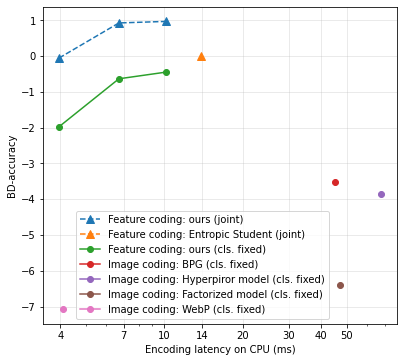

In [8]:
from matplotlib.ticker import ScalarFormatter

fig1, ax = plt.subplots(figsize=(6,5))
plt.plot(rac_ours_joint['latency'], rac_ours_joint['bd-acc'], label='Feature coding: ours (joint)',
         marker='^', markersize=8, linestyle='--')
plt.plot(rac_irvine['latency'], rac_irvine['bd-acc'], label='Feature coding: Entropic Student (joint)',
         marker='^', markersize=8, linestyle='--')
plt.plot(rac_ours_enc['latency'], rac_ours_enc['bd-acc'], label='Feature coding: ours (cls. fixed)',
         marker='.', markersize=12)
plt.plot(rac_bpg['latency'], rac_bpg['bd-acc'], label='Image coding: BPG (cls. fixed)',
         marker='.', markersize=12)
plt.plot(rac_hyper_mse['latency'], rac_hyper_mse['bd-acc'],
         label='Image coding: Hyperpiror model (cls. fixed)',
         marker='.', markersize=12)
plt.plot(rac_fac_mse['latency'], rac_fac_mse['bd-acc'],
         label='Image coding: Factorized model (cls. fixed)',
         marker='.', markersize=12)
# plt.plot(rac_fac_ms_ssim['latency'], rac_fac_ms_ssim['bd-acc'],
#          label='Image coding: Factorized model, MS-SSIM (cls. fixed)',
#          marker='.', markersize=12)
plt.plot(rac_webp['latency'], rac_webp['bd-acc'], label='Image coding: WebP (cls. fixed)',
         marker='.', markersize=12)

plt.xlabel('Encoding latency on CPU (ms)')
plt.ylabel('BD-accuracy')
plt.xscale('log')
plt.xticks([4, 7, 10, 14, 20, 30, 40, 50])
ax.get_xaxis().set_major_formatter(ScalarFormatter())
plt.grid(True, alpha=0.32)
plt.legend(loc='lower center', bbox_to_anchor=(0.45,0))
# plt.tight_layout()
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.92, top=0.98)
plt.savefig('rac.pdf')
